# Feature Selection

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

[Source: MachineLearningMastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

Sklearn feature selection methods: https://scikit-learn.org/stable/modules/feature_selection.html

Topics Covered:
* Filter Methods vs Embedded Methods vs Wrapper Methods
* Feed Foward Feature Selection
* Backward Stepwise Feature Selection
* Recursive Feature Elimination
* Curse of Dimensionality

## Types of Feature Selection

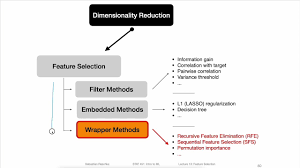

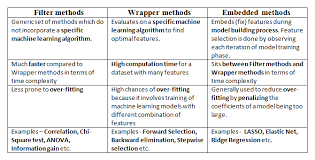

## Feed Foward Feature Selection

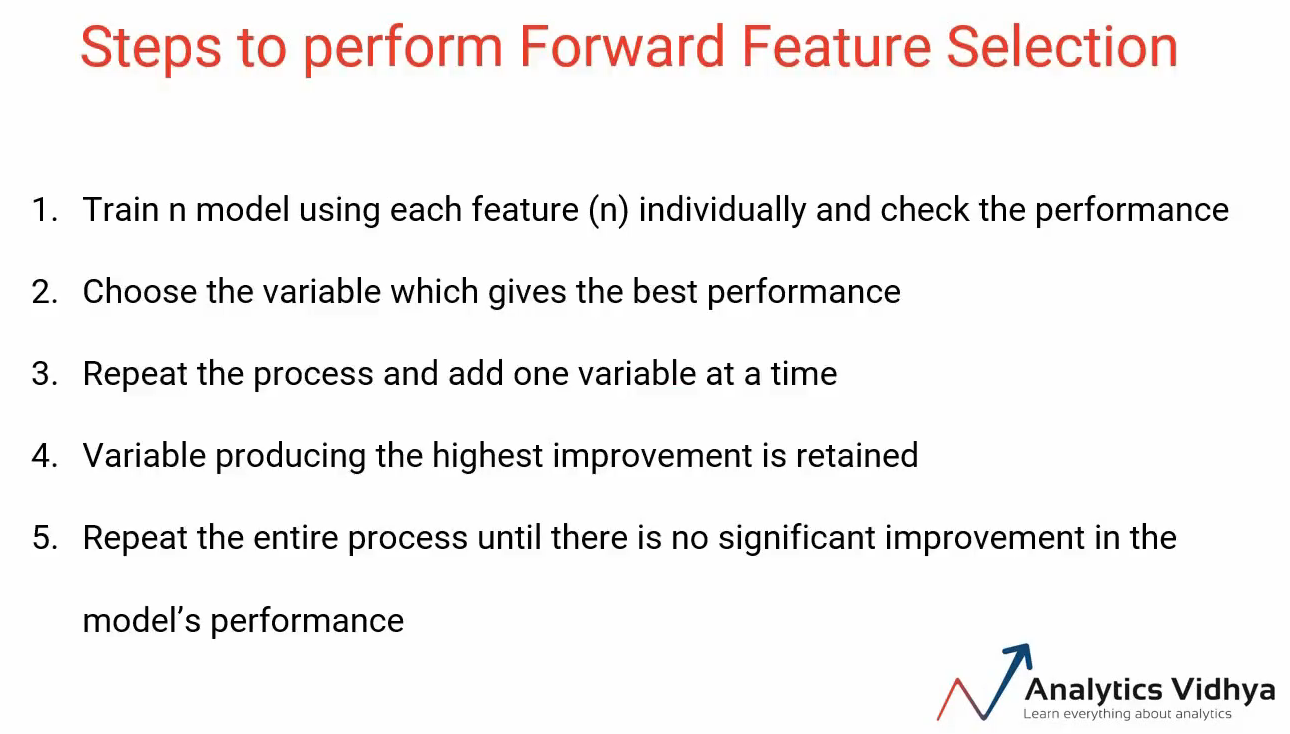

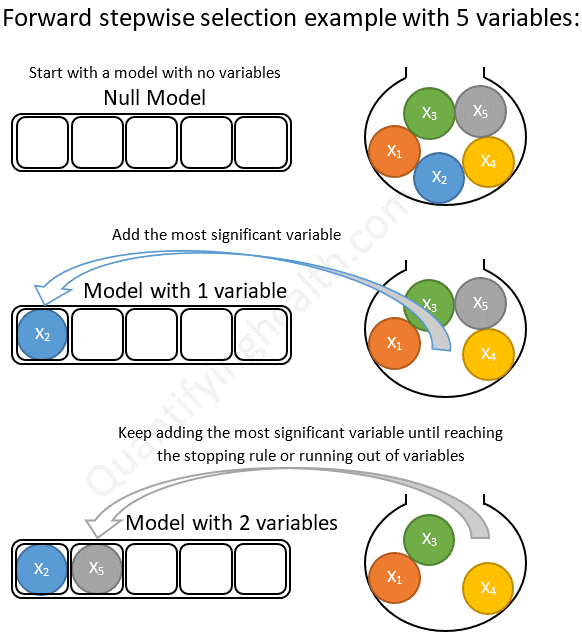

## Backward Stepwise Selection

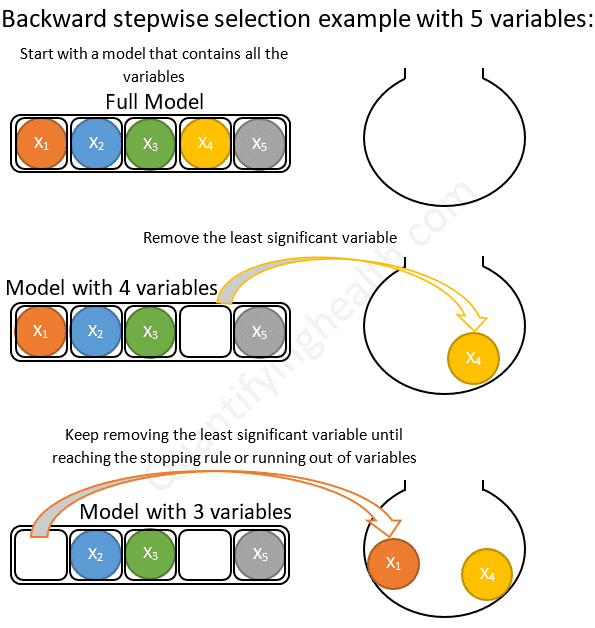

## Recursive Feature Elimination

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

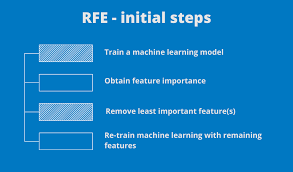

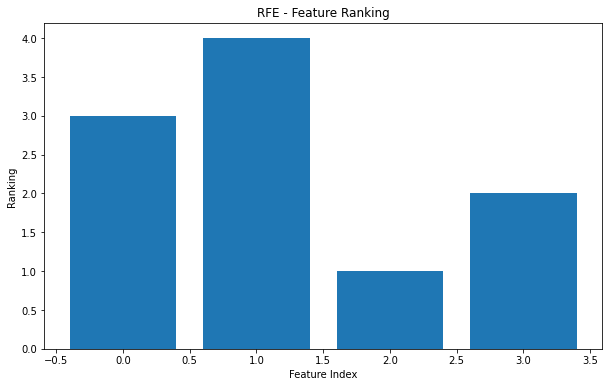

Selected Features: [2]
Accuracy on the Test Set: 0.9333333333333333


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the Iris dataset as an example
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier as the base model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Specify the number of features to select using RFE
num_features_to_select = 1

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = np.where(feature_ranking == 1)[0]

# Visualize the feature ranking
plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.show()

# Print the selected features
print("Selected Features:", selected_features)

# Train the final model using the selected features
model.fit(X_train[:, selected_features], y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test[:, selected_features], y_test)
print("Accuracy on the Test Set:", accuracy)

More Practice:

A good walkthough: https://rukshanpramoditha.medium.com/recursive-feature-elimination-rfe-in-regression-and-classification-models-7d2497930b10

## Breakout: Apply feature selection to the housing dataset